In [1]:
import pandas as pd

df = pd.read_csv("./qualitaet_spritzguss.csv")
df.head()

,Druck,Temperatur,Erfolg
0,724.412449,226.006619,0
1,716.099585,225.297905,0
2,792.625755,234.443889,0
3,594.515152,231.452907,1
4,653.436610,224.344378,0


In [2]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["Druck", "Temperatur"]].values
y = df["Erfolg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

## Daten vor Skalierung

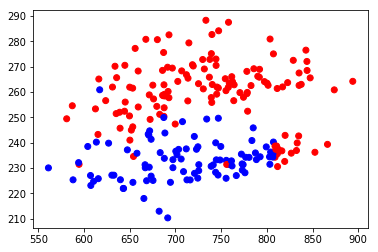

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("bwr")
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

## Skalierung der Daten
Wenn der Klassifikator räumliche Abstände auswertet, sollte man alle Achsen passend zueinander skalieren

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Daten nach Skalierung

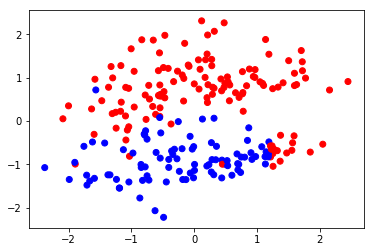

In [5]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

## SVM erstellen und trainieren

In [9]:
from sklearn.svm import SVC

model = SVC(kernel = "linear")
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.8933333333333333


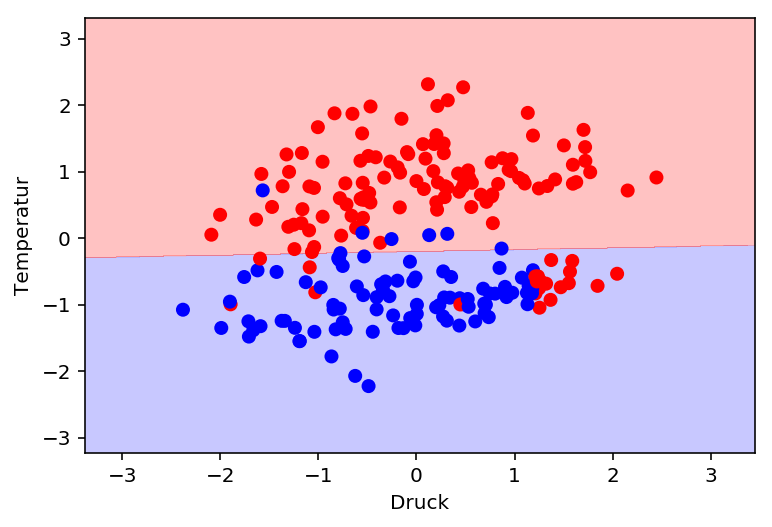

In [10]:
from helper import plot_classifier

# Trainings-Daten plotten
plot_classifier(model, X_train, y_train, proba = False, xlabel = "Druck", ylabel = "Temperatur")

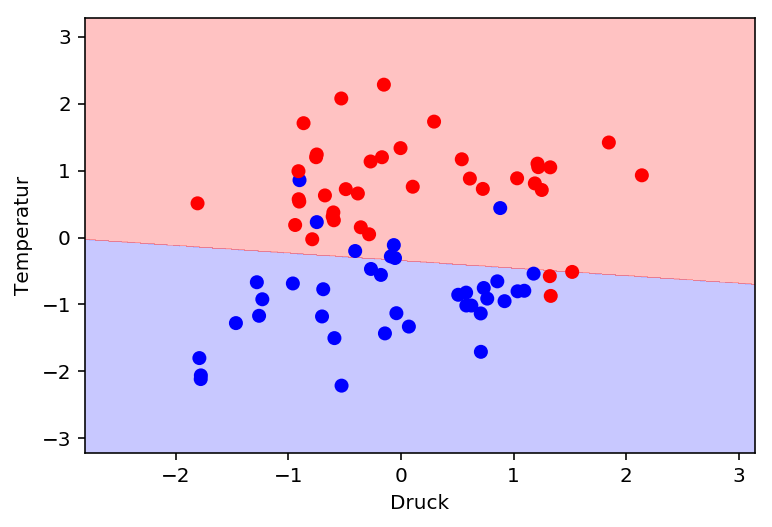

In [8]:
# Testdaten plotten
plot_classifier(model, X_test, y_test, proba = False, xlabel = "Druck", ylabel = "Temperatur")